In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import glob, os
from Bio import SeqIO

First get the number of CLs for which there are Bacteria hits

In [119]:
summaries_dir = "/home/danielc/projects/Bas_phages/5_nr_screening/2_hits_summary/"
summaries = glob.glob(f"{summaries_dir}/*.summary")

all_profiles = 4722
analyzed_profiles = len(summaries)
bacteria_profiles = 0

for file in summaries:
    df = pd.read_csv(file, header=0, sep="\t", index_col=0, low_memory=False)
    df = df[df.included]
    #print(df)
    
    if not df.empty:
        if "Bacteria" in df.superkingdom.values:
            bacteria_profiles += 1

/tmp/ipykernel_101765/1383471059.py:14: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if "Bacteria" in df.superkingdom.values:


In [120]:
bacteria_profiles

2394

2394 2321 7


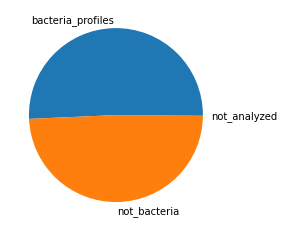

In [122]:
not_analyzed = all_profiles - analyzed_profiles
not_bacteria = analyzed_profiles - bacteria_profiles


print(bacteria_profiles, not_bacteria, not_analyzed)

y = np.array([bacteria_profiles, not_bacteria, not_analyzed])
mylabels = ["bacteria_profiles", "not_bacteria", "not_analyzed"]

plt.pie(y, labels = mylabels)
plt.show() 

In [123]:
# list summary files
summaries_dir = "/home/danielc/projects/Bas_phages/5_nr_screening/2_hits_summary/"
crass_faa_dir = "/home/danielc/projects/Bas_phages/4_protein_families/0_faa/"


taxa_counts_list = list() 

for summary in glob.glob(f"{summaries_dir}/*.summary"):
    #print(summary)
    cl_id = os.path.basename(summary).replace(".summary", "")
    
    # get n_seqs for Crassvirales
    nseqs_crass = len([record for record in SeqIO.parse(f"{crass_faa_dir}/{cl_id}.faa", "fasta")])
    taxa_counts_list.append([cl_id, "crassvirales", nseqs_crass])

    
    # read summary, keep only included True
    df = pd.read_csv(summary, index_col=0, header=0, sep="\t", low_memory=False)
    df = df[df.included]
    
    if not df.empty:
    
        counts = dict(df["superkingdom"].value_counts())
        for taxa, count in counts.items():
            taxa_counts_list.append([cl_id, taxa, count])
        
        
taxa_counts_df = pd.DataFrame(taxa_counts_list, columns=["cl_id", "taxa", "count"])
#taxa_counts_df.set_index("cl_id", inplace=True)

/home/danielc/miniconda3/envs/work/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


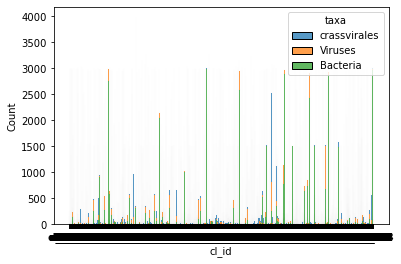

In [124]:
ax = sns.histplot(taxa_counts_df, x='cl_id', hue='taxa', weights='count',
             multiple='stack', shrink=0.8)

In [125]:
taxa_counts_df[taxa_counts_df["cl_id"] == "cl_0131"]

,cl_id,taxa,count
10992,cl_0131,crassvirales,255
10993,cl_0131,Viruses,6
10994,cl_0131,Bacteria,3


In [126]:
# get ratios
cls_counts = taxa_counts_df.groupby("cl_id")

nseqs_ratios_list = list()
taxa_fraction_list = list()

for cl in cls_counts:
    cl_id = cl[0]
    
    if "Bacteria" in cl[1].taxa.tolist():
        
        df = cl[1].set_index("taxa")
        
        total_seqs = df["count"].sum()
        
        if "Viruses" in df.index:
            viral_counts = df.loc["Viruses", "count"] + df.loc["crassvirales", "count"]
            
            viruses_counts = df.loc["Viruses", "count"]
            virus_fraction = viruses_counts/total_seqs
            taxa_fraction_list.append([cl_id, "Viruses", virus_fraction])
            
        else:
            viral_counts = df.loc["crassvirales", "count"]
        
        bacteria = df.loc["Bacteria", "count"]

        ratio = bacteria / viral
        nseqs_ratios_list.append([cl_id, ratio, total_seqs])
        
        # fraction
        crass_fraction = df.loc["crassvirales", "count"]/total_seqs
        taxa_fraction_list.append([cl_id, "crassvirales", crass_fraction])
        bact_fraction  = bacteria/total_seqs
        taxa_fraction_list.append([cl_id, "Bacteria", bact_fraction])

In [127]:
nseqs_ratios_df = pd.DataFrame(nseqs_ratios_list, columns=["cl_id", "ratio", "nseqs"])
taxa_fraction_df = pd.DataFrame(taxa_fraction_list, columns=["cl_id", "taxa", "fraction"])

In [128]:
taxa_fraction_df

,cl_id,taxa,fraction
0,cl_0008,crassvirales,0.343597
1,cl_0008,Bacteria,0.656403
2,cl_0025,Viruses,0.131148
3,cl_0025,crassvirales,0.815889
4,cl_0025,Bacteria,0.052963
...,...,...,...
6958,cl_s_777,crassvirales,0.461538
6959,cl_s_777,Bacteria,0.038462
6960,cl_s_778,Viruses,0.046083
6961,cl_s_778,crassvirales,0.949309


/home/danielc/miniconda3/envs/work/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


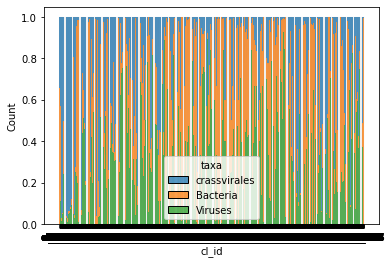

In [129]:
ax = sns.histplot(taxa_fraction_df, x='cl_id', hue='taxa', weights='fraction',
             multiple='stack', shrink=0.8)

In [130]:
# extract bacteria fractions, histogram
bact_fractions = taxa_fraction_df[taxa_fraction_df["taxa"] == "Bacteria"]
bact_fractions

,cl_id,taxa,fraction
1,cl_0008,Bacteria,0.656403
4,cl_0025,Bacteria,0.052963
7,cl_0027,Bacteria,0.014157
10,cl_0049,Bacteria,0.021239
13,cl_0071,Bacteria,0.444106
...,...,...,...
6951,cl_s_773,Bacteria,0.352060
6954,cl_s_774,Bacteria,0.090909
6956,cl_s_776,Bacteria,0.995324
6959,cl_s_777,Bacteria,0.038462


<AxesSubplot:xlabel='fraction', ylabel='Count'>

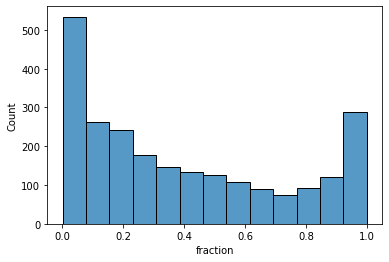

In [131]:
sns.histplot(data=bact_fractions, x="fraction")

In [138]:
bact_fractions[bact_fractions.fraction > 0.4][50:100]

,cl_id,taxa,fraction
571,cl_0944,Bacteria,0.843726
589,cl_0959,Bacteria,0.472684
604,cl_0981,Bacteria,0.666667
613,cl_0990,Bacteria,0.955539
625,cl_1003,Bacteria,0.929137
631,cl_1011,Bacteria,0.729662
643,cl_1023,Bacteria,0.980100
645,cl_1030,Bacteria,0.977749
647,cl_1033,Bacteria,0.976006
650,cl_1038,Bacteria,0.419753


In [135]:
bact_fractions[bact_fractions.cl_id == "cl_0113"]

,cl_id,taxa,fraction
30,cl_0113,Bacteria,0.081921
